In [1]:
!pip3 install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense, Flatten , Dropout, BatchNormalization, MaxPool2D


In [3]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [9]:
y_train[1]

array([9], dtype=uint8)

In [10]:
w_grid = 10
l_grid = 10

In [11]:
labels = ['airplane','automobile','bird','cat','deer',
          'dog','frog','horse','ship','truck']

C:\Users\shriy\AppData\Local\Temp\ipykernel_14240\3893856742.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


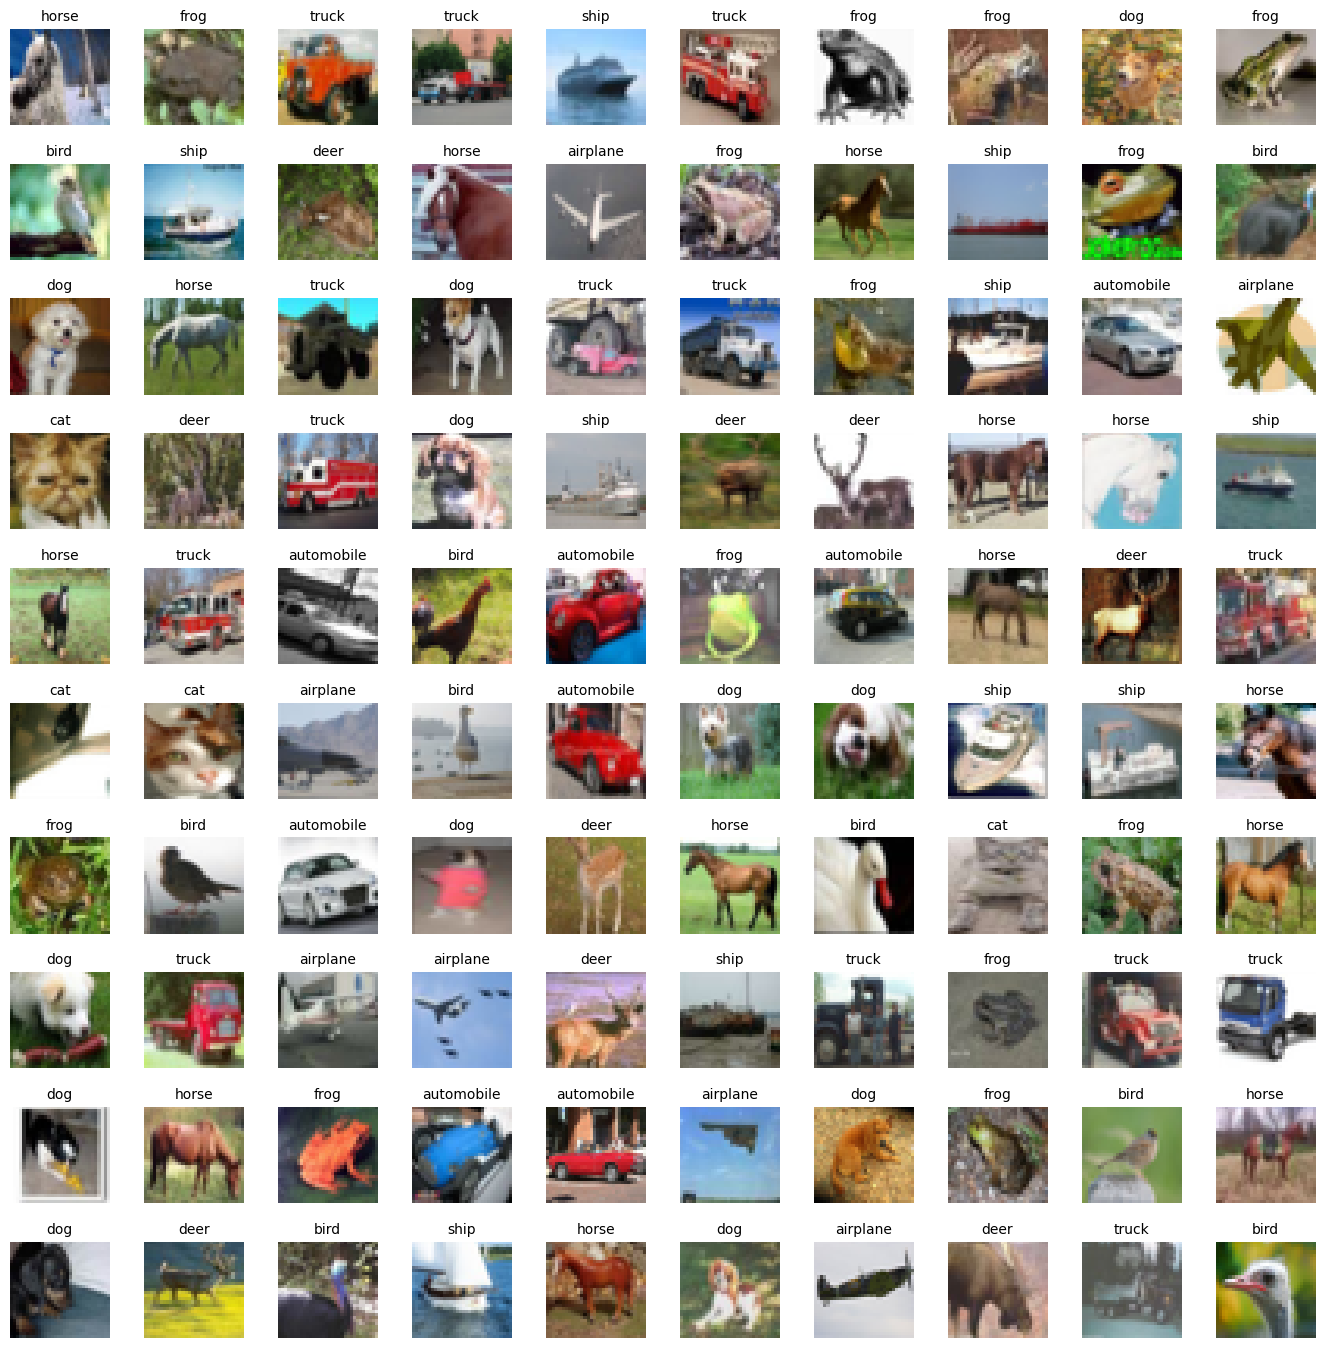

In [12]:
fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))
axes =axes.ravel()
n_train = len(X_train)


for i in np.arange(0,w_grid*l_grid):
    index = np.random.randint(0,n_train)
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize=10)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [36]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [16]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [17]:
y_train[8]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu")) 
model.add(Dense(10, activation="softmax"))

C:\Users\shriy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name="recall")]
             
             )

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,144,138 (4.36 MB)

 Trainable params: 1,143,690 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.fit(X_train, y_train, epochs = 10 , validation_data= (X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.4730 - loss: 1.5698 - precision: 0.6288 - recall: 0.3180 - val_accuracy: 0.6655 - val_loss: 0.9556 - val_precision: 0.7843 - val_recall: 0.5469
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7188 - loss: 0.8088 - precision: 0.8034 - recall: 0.6360 - val_accuracy: 0.6936 - val_loss: 0.8963 - val_precision: 0.7827 - val_recall: 0.6100
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.7818 - loss: 0.6349 - precision: 0.8452 - recall: 0.7228 - val_accuracy: 0.6955 - val_loss: 0.9276 - val_precision: 0.7637 - val_recall: 0.6333
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8261 - loss: 0.5084 - precision: 0.8753 - recall: 0.7827 - val_accuracy: 0.6615 - val_loss: 1.0958 - val_precision: 0.7174 - val_recall: 0.6131
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.8643 - loss: 0.3961 - precision: 0.8980 - recall: 0.8345 - val_accuracy: 0

In [40]:
model.save('image_classification_model.h5')

In [46]:
import pickle 

In [48]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)